# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [79]:
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep='/t"')

C:\Users\Ron Tohar\AppData\Local\Temp\ipykernel_13716\3150899219.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep='/t"')


In [80]:
# did it
def create_df(old_df):
    columns = old_df.columns
    columns = columns[0].split("\t")
    values = old_df.iloc[:,0]
    values = [value.split("\t") for value in values]
    df = pd.DataFrame(values)
    df.columns = columns
    return df

chipo = create_df(df)
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NULL,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NULL,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 4. See the first 10 entries

In [81]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NULL,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NULL,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NULL,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

<Axes: xlabel='item_name'>

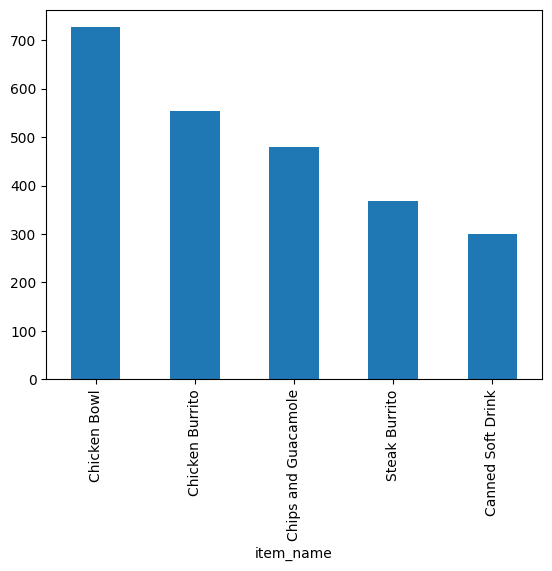

In [82]:
item_bought = chipo["item_name"].value_counts()
# item_bought.plot(kind="bar")
top_five = item_bought.sort_values(ascending=False).head(5)
top_five.plot(kind="bar")

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [83]:
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)
floaterizer = float
chipo.quantity = chipo.quantity.apply(floaterizer)
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1.0,Chips and Fresh Tomato Salsa,NULL,2.3
1,1,1.0,Izze,[Clementine],3.3
2,1,1.0,Nantucket Nectar,[Apple],3.3
3,1,1.0,Chips and Tomatillo-Green Chili Salsa,NULL,2.3
4,2,2.0,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.9
...,...,...,...,...,...
4617,1833,1.0,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.7
4618,1833,1.0,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.7
4619,1834,1.0,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.2
4620,1834,1.0,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.7


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


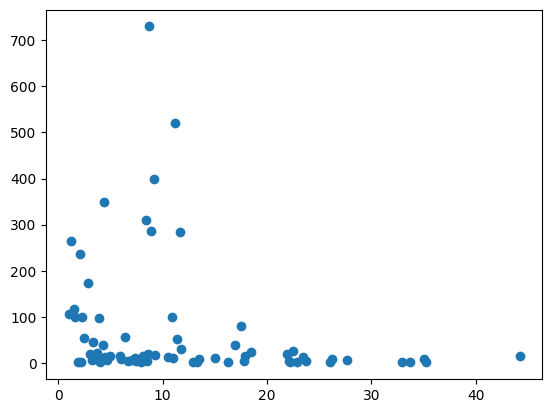

In [99]:

# chipo["item_price", "quantity"]
# chipo.loc[["item_price", "quantity"]]
print(chipo.columns)
price_quantity = chipo[["item_price","quantity"]].groupby(["item_price"]).sum()
plt.scatter(x=price_quantity.index,y=price_quantity.quantity)

### Step 7. BONUS: Create a question and a graph to answer your own question.